# try to understand the problem at $\cos\theta_\mu ~1$

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


## load mc and data

In [2]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']

In [3]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)

285009 ccqe candidate pairs, 180070 in FV
74387 are 1mu-1p, 41.3%
55226 are other-pairs, 30.7%
155396 are cosmic, 86.3%
--------------------------------------------------------------
36843 are CC1p0pi, 20.5%
--------------------------------------------------------------
40729 are CC1p, 22.6%
I finished loading overlay samples. We have in total 285009 pairs


In [4]:
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'
                              +versions['overlay date']+'/'
                              +versions['Overlay']+'_'+versions['overlay date']+'_summary.csv')
overlay_POT= np.sum(summary.POT)
f_POT_overlay = 4.908e+19/overlay_POT
print versions['Overlay'],'POT:',overlay_POT,',f_POT_detsys:',f_POT_overlay

prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2 POT: 9.6191658e+20 ,f_POT_detsys: 0.0510231354989


In [5]:
versions['Overlay'] = 'prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev'
MCMCSamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
reducedMCMCSamples,pureffMCMCSamples,_ = apply_cuts_to_overlay(OverlaySamples=MCMCSamples,cuts_order=cuts_order)

77421 ccqe candidate pairs, 52410 in FV
16201 are 1mu-1p, 30.9%
11342 are other-pairs, 21.6%
49947 are cosmic, 95.3%
--------------------------------------------------------------
8115 are CC1p0pi, 15.5%
--------------------------------------------------------------
8986 are CC1p, 17.1%
I finished loading overlay samples. We have in total 77421 pairs


In [7]:
versions['Overlay'] = 'prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev'
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'
                              +versions['overlay date']+'/'
                              +versions['Overlay']+'_'+versions['overlay date']+'_summary.csv')
overlay_POT= np.sum(summary.POT)
f_POT_mcmc = 4.908e+19/overlay_POT
print versions['Overlay'],'POT:',overlay_POT,',f_POT_mcmc:',f_POT_mcmc

 prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev POT: 2.025006708e+20 ,f_POT_mcmc: 0.242369567499


In [26]:
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
OnBeam = pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['beam on']+'_'+versions['data date']+'_vertices.csv')
OffBeam = pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['beam off']+'_'+versions['data date']+'_vertices.csv')

In [41]:
reducedOnBeam,reducedOffBeam,numbers = apply_cuts_to_data(OnBeam=OnBeam,OffBeam=OffBeam,cuts_order=cuts_order)

# lets look at single cosmic-muon tracks in the MC and datam

In [92]:
mcmc_tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/2018_07_17/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_07_17_tracks.csv')

In [93]:
overlay_tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/2018_07_10/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_07_10_tracks.csv')

In [94]:
off_beam_tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/2018_05_11/prod_reco_optfilter_extbnb_v12_mcc8_dev_04_2018_05_11_tracks.csv')

In [97]:
mcmc_cosmic_tracks = mcmc_tracks[mcmc_tracks['origin']=='cosmic ray']

In [99]:
overlay_cosmic_tracks = overlay_tracks[overlay_tracks['origin']=='unknown origin']

In [100]:
off_beam_cosmic_tracks = off_beam_tracks

        2
-3.008 x + 3.978 x - 0.2609


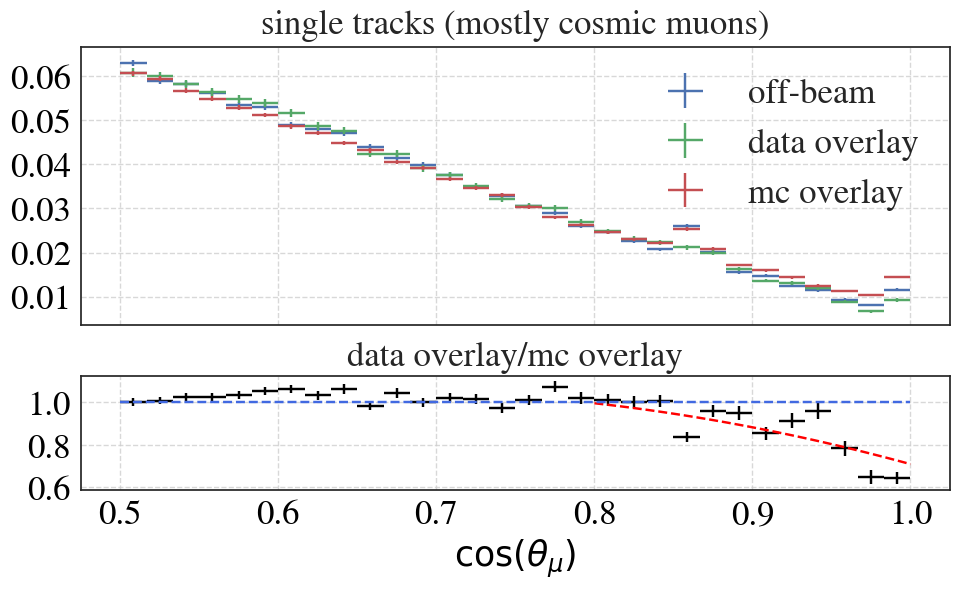

In [129]:
fig=plt.figure(figsize=(9.7,6))
ax=fig.add_subplot(3,1,(1,2))
bins = linspace(0.5,1,31); mid=0.5*(bins[1:]+bins[:-1]);bin_width=(mid[1]-mid[0])

y,yerr = dict(),dict()
integral = dict()
for sam,slabel in zip([off_beam_cosmic_tracks,mcmc_cosmic_tracks,overlay_cosmic_tracks]
                      ,['off-beam','data overlay','mc overlay']):
    h,_ = np.histogram(np.cos(sam['theta']),bins=bins)
    herr = np.sqrt(h)
    integral[slabel] = np.sum(h)
    y[slabel] = h.astype(np.float)/np.sum(h)
    yerr[slabel] = herr/np.sum(h)
    plt.errorbar(x=mid,xerr=0.5*bin_width,y=y[slabel],yerr=yerr[slabel],fmt='o',markersize=0,label=slabel)
set_axes(ax,x_label='',do_add_grid=True,do_add_legend=True,remove_ticks_x=True,title='single tracks (mostly cosmic muons)')

A = 0.05
cos_theta_cosmic = linspace(np.min(bins),np.max(bins),1000)
y_cosmic = A*(1-np.square(cos_theta_cosmic))
# plt.plot(cos_theta_cosmic,y_cosmic,'--',color='black')
# ax.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=25)

ax=fig.add_subplot(3,1,3)
ratio = y['data overlay']/y['mc overlay']
ratio_err = ratio*np.sqrt(1./(integral['data overlay']*y['data overlay'])+1./(integral['mc overlay']*y['mc overlay']))
plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err
             ,fmt='o',markersize=0,label=slabel,color='black')
poly = np.poly1d(np.polyfit(x=mid,y=ratio,deg=2))
print poly
x_poly = linspace(0.8,np.max(bins),100)
y_poly = poly(x_poly)
plt.plot(x_poly,y_poly,'--',color='red')


set_axes(ax,x_label=Vlabels['cos(theta(mu))'],do_add_grid=True,title='data overlay/mc overlay')
plt.plot([np.min(bins),np.max(bins)],[1,1],'--',color='royalblue')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/single_cosmic_tracks.pdf')

#  efficiency as a function of $\cos\theta_\mu$

In [78]:
genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/'
                                    +versions['overlay date']+'/'
                                    +versions['Overlay']+'_'+versions['overlay date']+'_genie.csv')

print len(genie),'events in genie'
genie_CC1p = genie[(genie.IsCC_1p_200MeVc==True)
                   & ((genie.truth_x>3) & (genie.truth_x<256))
                   & ((genie.truth_y>-115) & (genie.truth_y<115))
                   & ((genie.truth_z>5) & (genie.truth_y<1037))
                  ]

930168 events in genie


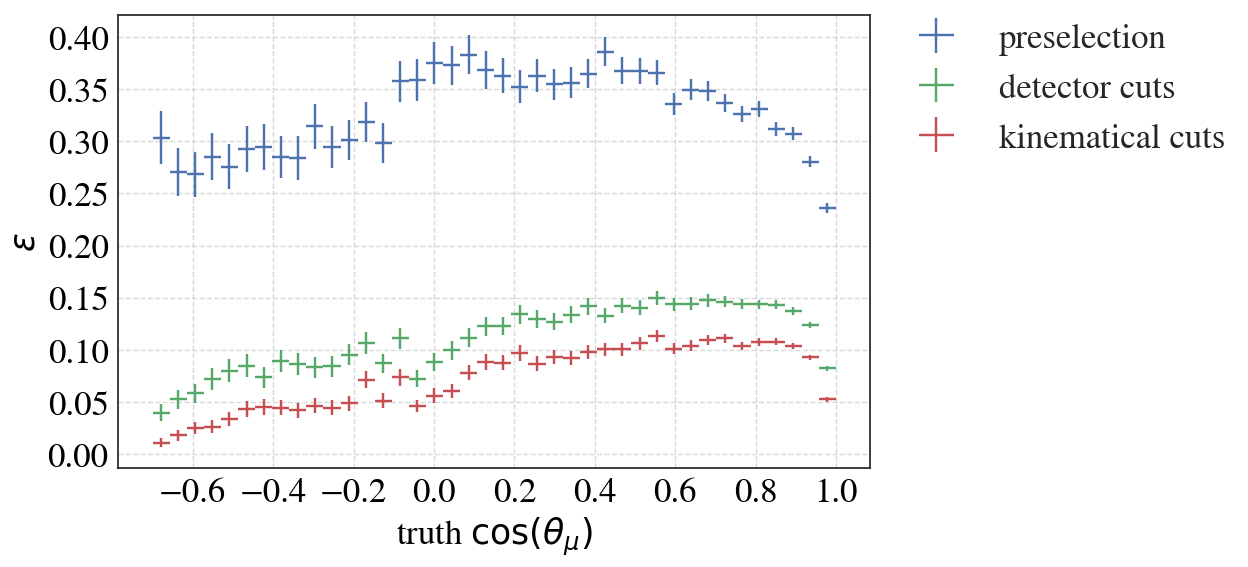

In [89]:
eff_cutoff = 0.01
ylabel=r'$\epsilon$'
fig=plt.figure(figsize=(9.7,6))
ax=fig.add_subplot(1,1,1)

for cut,clabel in zip(['no cut','vertex activity','Pt & delta phi']
                      ,['preselection','detector cuts','kinematical cuts']):
    eff=compute_effiency(genie_CC1p=genie_CC1p,selected_CC1p=reducedOverlay[cut]['CC1p']
                     ,bins=linspace(-0.7,1,41)
                     ,xvar='truth_Pmu_cos_theta',do_draw=False);

    plt.errorbar(x=eff['mid'],xerr=eff['bin width'],y=eff['eff'],yerr=eff['eff err']
#                      ,color='black'
                 ,capsize=10,fmt='.',markersize=0,label=clabel)
set_axes(ax,x_label=r'truth '+Vlabels['cos(theta(mu))']
         ,y_label=ylabel
#          ,ylim=(0,0.12)
         ,xticks=(-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1)
         ,do_add_grid=True,do_add_legend=True)
ax.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=25)

# distribution of muons from cosmic-data (overlay) as a function of $\cos\theta$

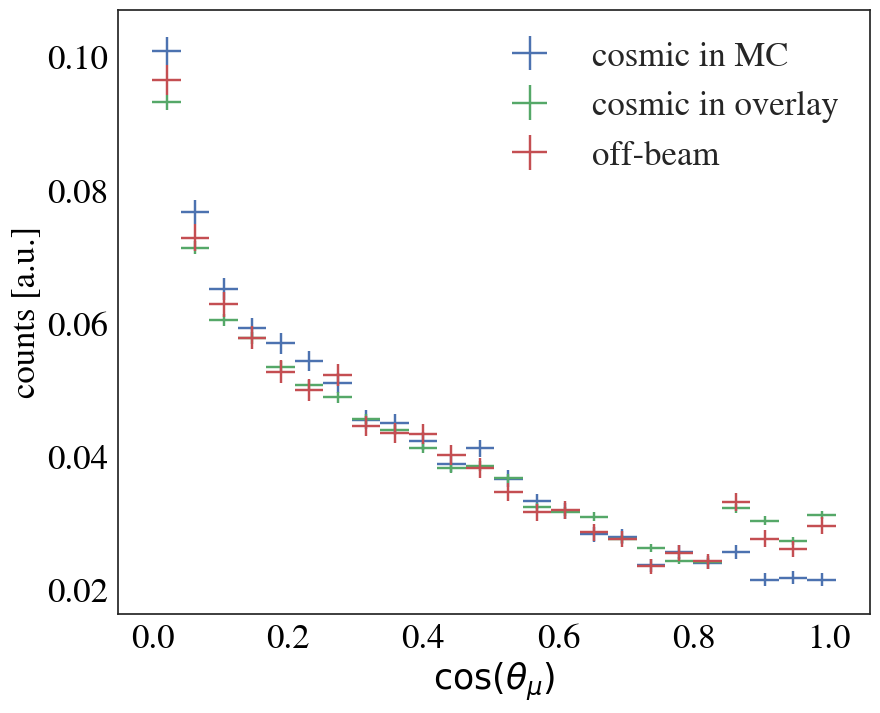

In [39]:
bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable='cos(theta(mu))')
bins = linspace(0,1.01,25); mid=0.5*(bins[1:]+bins[:-1]);bin_width=(mid[1]-mid[0])
fig=plt.figure(figsize=(9.7,8))
ax=fig.add_subplot(1,1,1)
for sample,slabel in zip([reducedMCMCSamples['no cut']['cosmic'],reducedOverlay['no cut']['cosmic'],OffBeam]
                               ,['cosmic in MC','cosmic in overlay','off-beam']):
    h,_ = np.histogram(sample['reco_Pmu_cos_theta'],bins=bins)
    herr = np.sqrt(h)
    y = h.astype(np.float)/np.sum(h)
    yerr = herr/np.sum(h)
    if slabel=='cosmic in overlay': A = y[0]
    plt.errorbar(x=mid,xerr=0.5*bin_width,y=y,yerr=yerr,fmt='o',markersize=0,label=slabel)

cos_theta_cosmic = linspace(np.min(bins),np.max(bins)-0.1,1000)
y_cosmic = A*(1-np.square(cos_theta_cosmic))
# plt.plot(cos_theta_cosmic,y_cosmic,'--',color='black')
set_axes(ax,xlabel,'counts [a.u.]',do_add_legend=True)

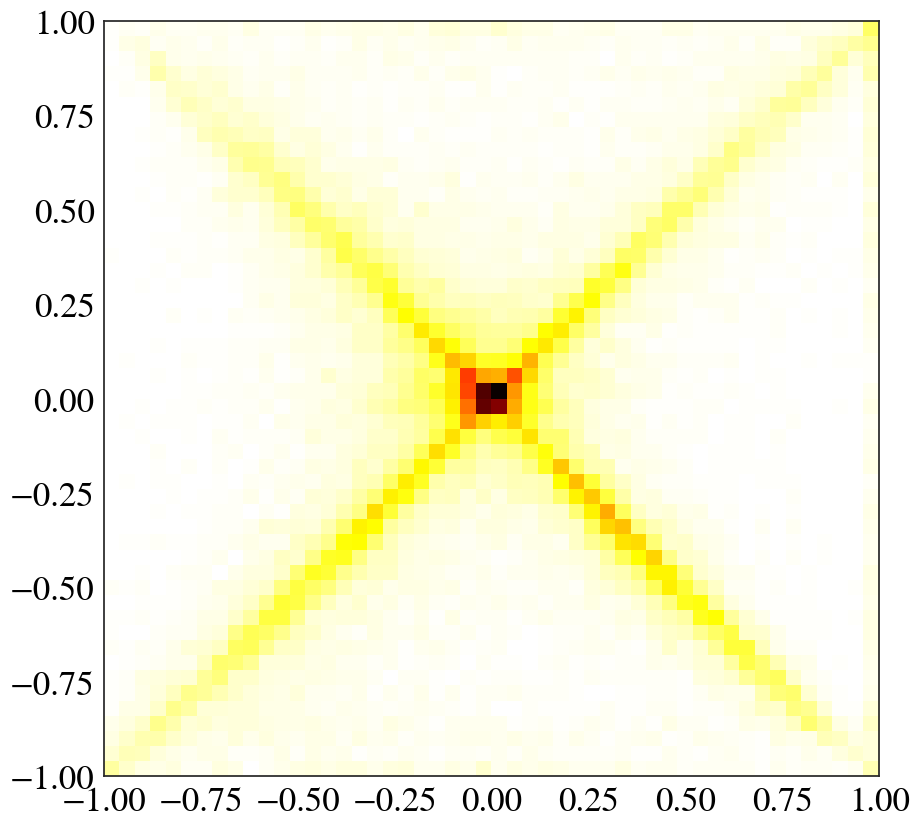

In [48]:
bins = linspace(0,1.01,15); mid=0.5*(bins[1:]+bins[:-1]);bin_width=(mid[1]-mid[0])
sam = reducedMCMCSamples['no cut']['cosmic']
plot_2d_hist(sam['truth_Pmu_cos_theta'],sam['reco_Pmu_cos_theta']);
# fig=plt.figure(figsize=(9.7,8))
# ax=fig.add_subplot(1,1,1)
# for sample,slabel in zip([reducedMCMCSamples['Pt & delta phi']['cosmic'],reducedOverlay['Pt & delta phi']['cosmic'],reducedOffBeam['Pt & delta phi']]
#                                ,['cosmic in MC','cosmic in overlay','off-beam']):
#     h,_ = np.histogram(sample['reco_Pmu_cos_theta'],bins=bins)
#     herr = np.sqrt(h)
#     y = h.astype(np.float)/np.sum(h)
#     yerr = herr/np.sum(h)
#     if slabel=='cosmic in overlay': A = y[0]
#     plt.errorbar(x=mid,xerr=0.5*bin_width,y=y,yerr=yerr,fmt='o',markersize=0,label=slabel)

# cos_theta_cosmic = linspace(np.min(bins),np.max(bins)-0.1,1000)
# y_cosmic = A*(1-np.square(cos_theta_cosmic))
# # plt.plot(cos_theta_cosmic,y_cosmic,'--',color='black')
# set_axes(ax,xlabel,'counts [a.u.]',do_add_legend=True)

In [49]:
for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)
bins1,bins2,bins3 = Bins['Pmu'], Bins['cos(theta(mu))'] , Bins['phi(mu)']
N1,N2,N3 = len(bins1)-1,len(bins2)-1,len(bins3)-1

In [52]:
def compute_Xsec_in_3d(beam_on=None,beam_off=None
                       ,generated_CC1p=None,selected_CC1p=None,overlay=None
                       ,NBins=7
                       ,option=None
                       ,ob_1='Pmu',ob_2='cos(theta(mu))',ob_3='phi(mu)'
                       ,reco_1='reco_Pmu_mcs',reco_2='reco_Pmu_cos_theta',reco_3='reco_Pmu_mcs_phi'
                       ,true_1='truth_Pmu',true_2='truth_Pmu_cos_theta',true_3='truth_Pmu_phi'
                       # for fixing muon bins
                       ,fixed_CC1p=None, fixed_overlay=None
                       ,do_in_kin_cuts=True
                      ):
    # the return is a dictionary of results    
    for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)
    global bins1,bins2,bins3,N1,N2,N3
    bins1,bins2,bins3 = Bins[ob_1], Bins[ob_2] , Bins[ob_3]
    N1,N2,N3 = len(bins1)-1,len(bins2)-1,len(bins3)-1
        
    h = dict()
    keys = ['on','off scaled','generated','generated in kin. cuts','CC1p','CC1p scaled','B','eff','eff err'
              ,'Xsec','Xsec err','mc-Xsec','mc-Xsec err','generated-Xsec','generated-Xsec err']
    for key in keys: h[key] = np.zeros((N1,N2,N3))
    N = dict()
    for i_P in range(N1):#{
        Pmin,Pmax = bins1[i_P],bins1[i_P+1]
        P_bin_width = Pmax - Pmin
        for i_cos_theta in range(N2):#{
            cos_theta_min,cos_theta_max = bins2[i_cos_theta],bins2[i_cos_theta+1]
            cos_theta_bin_width = cos_theta_max - cos_theta_min

            for i_phi in range(N3):#{
                phi_min,phi_max = bins3[i_phi],bins3[i_phi+1]
                phi_bin_width = phi_max - phi_min
                
                bin_width = P_bin_width * cos_theta_bin_width * phi_bin_width

                beam_on_in_bin = sam_in_3d_bin(beam_on,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max)
                N['on'] = len(beam_on_in_bin)
                h['on'][i_P][i_cos_theta][i_phi] = N['on']
                
                Xsec_in_bin , Xsec_err_in_bin = 0 , 0
                mc_Xsec_in_bin , mc_Xsec_err_in_bin = 0 , 0
                
                N['off'] = len(sam_in_3d_bin(beam_off,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max))
                N['off scaled'] = N['off']*OffBeam_scaling
                h['off scaled'][i_P][i_cos_theta][i_phi] = N['off scaled']


                N['generated'] = len(sam_in_3d_bin(generated_CC1p,
                                               true_1,Pmin,Pmax,
                                               true_2,cos_theta_min,cos_theta_max,
                                               true_3,phi_min,phi_max))
                N['generated scaled'] = N['generated']*Nevents['f(POT)']
                h['generated'][i_P][i_cos_theta][i_phi] = N['generated']

                delta_theta_12=55  # deg.
                delta_Delta_phi=35 # deg.
                Pt_max=0.35        # GeV/c
                generated_CC1p_in_kin_cuts = generated_CC1p[(np.abs(generated_CC1p['theta_12']-90)<delta_theta_12)                                              
                                                            &(generated_CC1p['Pt']<Pt_max)
                                                            &(np.abs(generated_CC1p['delta_phi']-180.)<delta_Delta_phi)]
                N['generated in kin. cuts'] = len(sam_in_3d_bin(generated_CC1p_in_kin_cuts,
                                                                true_1,Pmin,Pmax,
                                                                true_2,cos_theta_min,cos_theta_max,
                                                                true_3,phi_min,phi_max))
                N['generated in kin. cuts scaled'] = N['generated in kin. cuts']*Nevents['f(POT)']
                h['generated in kin. cuts'][i_P][i_cos_theta][i_phi] = N['generated in kin. cuts']


                N['CC1p'] = len(sam_in_3d_bin(selected_CC1p,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max))
                h['CC1p'][i_P][i_cos_theta][i_phi] = N['CC1p']

                N['CC1p scaled'] = N['CC1p']*Nevents['f(POT)']
                h['CC1p scaled'][i_P][i_cos_theta][i_phi] = N['CC1p scaled']
                if option=='fixed cross-section':
                    N['fixed CC1p'] = len(sam_in_3d_bin(fixed_CC1p,
                                                   reco_1,Pmin,Pmax,
                                                   reco_2,cos_theta_min,cos_theta_max,
                                                   reco_3,phi_min,phi_max))
                    N['fixed CC1p scaled'] = N['fixed CC1p']*Nevents['f(POT)']

                
                N['ovrelay'] = len(sam_in_3d_bin(overlay,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max))
                N['ovrelay scaled'] = N['ovrelay']*Nevents['f(POT)']
                
                if option=='fixed cross-section':
                    N['fixed ovrelay'] = len(sam_in_3d_bin(fixed_overlay,
                                                   reco_1,Pmin,Pmax,
                                                   reco_2,cos_theta_min,cos_theta_max,
                                                   reco_3,phi_min,phi_max))
                    N['fixed ovrelay scaled'] = N['fixed ovrelay']*Nevents['f(POT)']


                    
                B, B_err = N['ovrelay scaled'] - N['CC1p scaled'] , np.sqrt(N['ovrelay scaled'] - N['CC1p scaled'])
                h['B'][i_P][i_cos_theta][i_phi] = B

                if option=='fixed cross-section':
                    fixed_B, fixed_B_err = N['fixed ovrelay scaled'] - N['fixed CC1p scaled'] , np.sqrt(N['fixed ovrelay scaled'] - N['fixed CC1p scaled'])
                
                eff, eff_err = get_eff(Ngen=N['generated'] , Nsel=N['CC1p'])
                if do_in_kin_cuts:
                    eff, eff_err = get_eff(Ngen=N['generated in kin. cuts'] , Nsel=N['CC1p'])
                h['eff'][i_P][i_cos_theta][i_phi] = eff
                h['eff err'][i_P][i_cos_theta][i_phi] = eff_err

                    
                Xsec_in_bin,Xsec_err_in_bin = compute_Xsec(Non=N['on'], Noff=N['off'], B=B, eff=eff, 
                                                               bin_width = bin_width,
                                                               Non_err = np.sqrt(N['on']),
                                                               Noff_err= np.sqrt(N['off']),
                                                               B_err   = B_err,eff_err = eff_err)
                if option=='fixed cross-section':
                    Xsec_in_bin,Xsec_err_in_bin = compute_Xsec(Non=N['on'], Noff=N['off'], B=fixed_B, eff=eff, 
                                                               bin_width = bin_width,
                                                               Non_err = np.sqrt(N['on']),
                                                               Noff_err= np.sqrt(N['off']),
                                                               B_err   = fixed_B_err,eff_err = eff_err)

                mc_Xsec_in_bin,mc_Xsec_err_in_bin = compute_Xsec(Non=N['CC1p scaled'], eff=eff,
                                                                     bin_width = bin_width,
                                                                     Non_err = np.sqrt(N['CC1p'])*Nevents['f(POT)'],
                                                                     eff_err = eff_err)                
                if option == 'fix phi~0 by a factor of 3' and ob_1=='Pmu':
                    if i_phi==(N3/2): 
                        Xsec_in_bin,Xsec_err_in_bin = 3*Xsec_in_bin , Xsec_err_in_bin
                        mc_Xsec_in_bin,mc_Xsec_err_in_bin = mc_Xsec_in_bin,mc_Xsec_err_in_bin
                    
                elif option == 'fix cos(theta)~1 by a factor of 2' and ob_1=='Pmu':
                    if i_cos_theta==N2-1: 
                        Xsec_in_bin,Xsec_err_in_bin = 2*Xsec_in_bin , Xsec_err_in_bin
                        mc_Xsec_in_bin,mc_Xsec_err_in_bin = mc_Xsec_in_bin,mc_Xsec_err_in_bin

                elif option == 'fix cos(theta)~1 by a factor of 2 and phi~0 by a factor 2' and ob_1=='Pmu':
                    if i_cos_theta==N2-1: 
                        Xsec_in_bin,Xsec_err_in_bin = 2*Xsec_in_bin , Xsec_err_in_bin
                        mc_Xsec_in_bin,mc_Xsec_err_in_bin = mc_Xsec_in_bin,mc_Xsec_err_in_bin
                    if i_phi==(N3/2): 
                        Xsec_in_bin,Xsec_err_in_bin = 2*Xsec_in_bin , Xsec_err_in_bin
                        mc_Xsec_in_bin,mc_Xsec_err_in_bin = mc_Xsec_in_bin,mc_Xsec_err_in_bin                        

                h['Xsec'][i_P][i_cos_theta][i_phi] = Xsec_in_bin
                h['Xsec err'][i_P][i_cos_theta][i_phi] = Xsec_err_in_bin
                h['mc-Xsec'][i_P][i_cos_theta][i_phi] = mc_Xsec_in_bin
                h['mc-Xsec err'][i_P][i_cos_theta][i_phi] = mc_Xsec_err_in_bin
            #} i_Pmu_phi
        #} i_Pmu_cos_theta
    #} i_Pmu
    print 'done.'  
    return h

In [51]:
def get_Xsec(h = None ,afro_genie_dict=dict(),ylim_P=(0,9),ylim_cos_theta=(0,9),ylim_phi=(0,0.1)
             ,do_add_genie_models=True
             ,ob_1='Pmu',ob_2='cos(theta(mu))',ob_3='phi(mu)'             
             ,true_1='truth_Pmu',true_2='truth_Pmu_cos_theta',true_3='truth_Pmu_phi'
            ):
    get_integrated_Xsec(h=h);
    for gname,ls in zip(['nominal','hA2015','hA_SRC'],['-','--','-.']):
        afro_genie_CC1p = afro_genie_dict[gname]    
        afro_Xsec,afro_Xsec_err = compute_Xsec(Non=len(afro_genie_CC1p), Non_err=np.sqrt(len(afro_genie_CC1p)))
        afro_Xsec,afro_Xsec_err = afro_Xsec*4.908e19/4.9e20,afro_Xsec_err*4.908e19/4.9e20
        print gname,'afro genie Xsec: %.2f ± %.2f'%(afro_Xsec,afro_Xsec_err),'e-39 cm2' 
    fig=plt.figure(figsize=(28,8))
    observable = ob_1
    bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
    Xsec_1d,Xsec_1d_err,mc_Xsec_1d,mc_Xsec_1d_err = np.zeros(N1),np.zeros(N1),np.zeros(N1),np.zeros(N1)
    for i_P in range(N1):#{
        Xsec_1d_err_sq_sum,mc_Xsec_1d_err_sq_sum = 0,0
        for i_cos_theta in range(N2):#{
            cos_theta_bin_width = bins2[i_cos_theta+1] - bins2[i_cos_theta]
            for i_phi in range(N3):#{
                phi_bin_width = bins3[i_phi+1] - bins3[i_phi]            
                Xsec_1d[i_P] += h['Xsec'][i_P][i_cos_theta][i_phi] * cos_theta_bin_width * phi_bin_width
                Xsec_1d_err_sq_sum += np.square(h['Xsec err'][i_P][i_cos_theta][i_phi] * cos_theta_bin_width * phi_bin_width)
                mc_Xsec_1d[i_P] += h['mc-Xsec'][i_P][i_cos_theta][i_phi] * cos_theta_bin_width * phi_bin_width
                mc_Xsec_1d_err_sq_sum += np.square(h['mc-Xsec err'][i_P][i_cos_theta][i_phi] * cos_theta_bin_width * phi_bin_width)
            #}
        #}        
        Xsec_1d_err[i_P] = np.sqrt(Xsec_1d_err_sq_sum)
        mc_Xsec_1d_err[i_P] = np.sqrt(mc_Xsec_1d_err_sq_sum)
    #}
    ax = fig.add_subplot(1,3,1)
    ax.bar( x=mid , height=2*mc_Xsec_1d_err, bottom=mc_Xsec_1d-mc_Xsec_1d_err, width=bin_width, color=Colors['CC1p'])
    #     ax.bar( x=mid , height=2*genie_Xsec_err, bottom=genie_Xsec-genie_Xsec_err, width=bin_width, color='black')
    ax.errorbar( x=mid , xerr=0.5*bin_width, y=Xsec_1d, yerr=Xsec_1d_err , fmt='o', markersize=10
                        , color=Colors['beam on'], capsize=1, capthick=3, label='data')
    if do_add_genie_models:
        for gname,ls in zip(['nominal','hA2015','hA_SRC'],['-','--','-.']):
            h_genie,_ = np.histogram(afro_genie_dict[gname][true_1],bins=bins)
            h_genie_err = np.sqrt(h_genie)
            h_genie,h_genie_err = h_genie*4.908e19/4.9e20, h_genie_err*4.908e19/4.9e20
            genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
            for i in range(len(bins)-1):
                genie_Xsec[i],genie_Xsec_err[i] = compute_Xsec(Non=h_genie[i], Non_err=h_genie_err[i] ,eff=1,eff_err=0,B=0, bin_width=bin_width )
            mystep(x=mid ,dx=bin_width, y=genie_Xsec, y_width=genie_Xsec_err, color='black',linestyle=ls,linewidth=3,label=r'genie ('+gname+')')    
    set_axes(ax,xlabel
             ,y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$' +r'$\left[10^{-39} \frac{cm^{2}}{(%s)}\right]$'%units)
             ,ylim=ylim_P)
    #-------------------------------
    observable = ob_2
    bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
    Xsec_1d,Xsec_1d_err,mc_Xsec_1d,mc_Xsec_1d_err = np.zeros(N2),np.zeros(N2),np.zeros(N2),np.zeros(N2)
    for i_cos_theta in range(N2):#{
        Xsec_1d_err_sq_sum,mc_Xsec_1d_err_sq_sum = 0,0
        for i_P in range(N1):#{
            P_bin_width = bins1[i_P+1] - bins1[i_P]
            for i_phi in range(N3):#{
                phi_bin_width = bins3[i_phi+1] - bins3[i_phi]            
                Xsec_1d[i_cos_theta] += h['Xsec'][i_P][i_cos_theta][i_phi] * P_bin_width * phi_bin_width
                Xsec_1d_err_sq_sum += np.square(h['Xsec err'][i_P][i_cos_theta][i_phi] * P_bin_width * phi_bin_width)
                mc_Xsec_1d[i_cos_theta] += h['mc-Xsec'][i_P][i_cos_theta][i_phi] * P_bin_width * phi_bin_width
                mc_Xsec_1d_err_sq_sum += np.square(h['mc-Xsec err'][i_P][i_cos_theta][i_phi] * P_bin_width * phi_bin_width)
            #}
        #}        
        Xsec_1d_err[i_cos_theta] = np.sqrt(Xsec_1d_err_sq_sum)
        mc_Xsec_1d_err[i_cos_theta] = np.sqrt(mc_Xsec_1d_err_sq_sum)
    #}
    ax = fig.add_subplot(1,3,2)
    ax.bar( x=mid , height=2*mc_Xsec_1d_err, bottom=mc_Xsec_1d-mc_Xsec_1d_err, width=bin_width, color=Colors['CC1p'])
    # ax.bar( x=mid , height=2*genie_Xsec_err, bottom=genie_Xsec-genie_Xsec_err, width=bin_width, color='black')
    ax.errorbar( x=mid , xerr=0.5*bin_width, y=Xsec_1d, yerr=Xsec_1d_err , fmt='o', markersize=10
                        , color=Colors['beam on'], capsize=1, capthick=3, label='data')
    if do_add_genie_models:
        for gname,ls in zip(['nominal','hA2015','hA_SRC'],['-','--','-.']):
            h_genie,_ = np.histogram(afro_genie_dict[gname][true_2],bins=bins)
            h_genie_err = np.sqrt(h_genie)
            h_genie,h_genie_err = h_genie*4.908e19/4.9e20, h_genie_err*4.908e19/4.9e20
            genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
            for i in range(len(bins)-1):
                genie_Xsec[i],genie_Xsec_err[i] = compute_Xsec(Non=h_genie[i], Non_err=h_genie_err[i] ,eff=1,eff_err=0,B=0, bin_width=bin_width )
            mystep(x=mid ,dx=bin_width, y=genie_Xsec, y_width=genie_Xsec_err, color='black',linestyle=ls,linewidth=3,label=r'genie ('+gname+')')
    set_axes(ax,xlabel
                 ,y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$'
                           +r'[$10^{-39}$ cm$^{2}$]'),ylim=ylim_cos_theta)
    # #-------------------------------
    observable = ob_3
    bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)

    Xsec_1d,Xsec_1d_err,mc_Xsec_1d,mc_Xsec_1d_err = np.zeros(N3),np.zeros(N3),np.zeros(N3),np.zeros(N3)
    for i_phi in range(N3):#{
        Xsec_1d_err_sq_sum,mc_Xsec_1d_err_sq_sum = 0,0
        for i_P in range(N1):#{
            P_bin_width = bins1[i_P+1] - bins1[i_P]
            for i_cos_theta in range(N2):#{
                cos_theta_bin_width = bins2[i_cos_theta+1] - bins2[i_cos_theta]            
                Xsec_1d[i_phi] += h['Xsec'][i_P][i_cos_theta][i_phi] * P_bin_width * cos_theta_bin_width
                Xsec_1d_err_sq_sum += np.square(h['Xsec err'][i_P][i_cos_theta][i_phi] * P_bin_width * cos_theta_bin_width)
                mc_Xsec_1d[i_phi] += h['mc-Xsec'][i_P][i_cos_theta][i_phi] * P_bin_width * cos_theta_bin_width
                mc_Xsec_1d_err_sq_sum += np.square(h['mc-Xsec err'][i_P][i_cos_theta][i_phi] * P_bin_width * cos_theta_bin_width)
            #}
        #}        
        Xsec_1d_err[i_phi] = np.sqrt(Xsec_1d_err_sq_sum)
        mc_Xsec_1d_err[i_phi] = np.sqrt(mc_Xsec_1d_err_sq_sum)
    #}
    ax = fig.add_subplot(1,3,3)
    ax.bar( x=mid , height=2*mc_Xsec_1d_err, bottom=mc_Xsec_1d-mc_Xsec_1d_err, width=bin_width, color=Colors['CC1p'])
    #ax.bar( x=mid , height=2*genie_Xsec_err, bottom=genie_Xsec-genie_Xsec_err, width=bin_width, color='black')
    ax.errorbar( x=mid , xerr=0.5*bin_width, y=Xsec_1d, yerr=Xsec_1d_err , fmt='o', markersize=10
                        , color=Colors['beam on'], capsize=1, capthick=3, label='data')
    if do_add_genie_models:
        for gname,ls in zip(['nominal','hA2015','hA_SRC'],['-','--','-.']):
            h_genie,_ = np.histogram(180./np.pi*afro_genie_dict[gname][true_3],bins=bins)
            h_genie_err = np.sqrt(h_genie)
            h_genie,h_genie_err = h_genie*4.908e19/4.9e20, h_genie_err*4.908e19/4.9e20
            genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
            for i in range(len(bins)-1):
                genie_Xsec[i],genie_Xsec_err[i] = compute_Xsec(Non=h_genie[i], Non_err=h_genie_err[i] ,eff=1,eff_err=0,B=0, bin_width=bin_width )
            mystep(x=mid ,dx=bin_width, y=genie_Xsec, y_width=genie_Xsec_err, color='black',linestyle=ls,linewidth=3,label=r'genie ('+gname+')')

    set_axes(ax,xlabel
             ,y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$'+r'$\left[10^{-39} \frac{cm^{2}}{(%s)}\right]$'%units)
             ,do_add_legend=False,ylim=ylim_phi)
    plt.tight_layout()
    print 'done.'

In [56]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_08_16_selected_genie_CC1p.csv and found the file...
9823 selected CC1p events overlay


In [59]:
genie_CC1p['theta_12'] = 180./np.pi*np.arccos((genie_CC1p['truth_Pp_x']*genie_CC1p['truth_Pmu_x']
                                                                   +genie_CC1p['truth_Pp_y']*genie_CC1p['truth_Pmu_y']
                                                                   +genie_CC1p['truth_Pp_z']*genie_CC1p['truth_Pmu_z'])
                                                                  /(genie_CC1p['truth_Pp']*genie_CC1p['truth_Pmu']))
genie_CC1p['Pt'] = np.sqrt(np.square(genie_CC1p['truth_Pp_x']+genie_CC1p['truth_Pmu_x'])
                                               +np.square(genie_CC1p['truth_Pp_y']+genie_CC1p['truth_Pmu_y']))
genie_CC1p['delta_phi'] = 180./np.pi*np.abs(genie_CC1p['truth_Pp_phi']-genie_CC1p['truth_Pmu_phi'])

In [75]:
# without correction on kinematical cuts
h = compute_Xsec_in_3d(NBins=11,
                       beam_on=selected_beam_on,
                       beam_off=selected_beam_off,                       
                       generated_CC1p=genie_CC1p,                       
                       selected_CC1p=selected_CC1p ,                       
                       overlay=selected_overlay_concat,
                       do_in_kin_cuts=True) 

done.


Xsec_integrated: 4.62 +/- 0.34 e-39 cm2
mc_Xsec_integrated: 5.43 +/- 0.09 e-39 cm2
done.


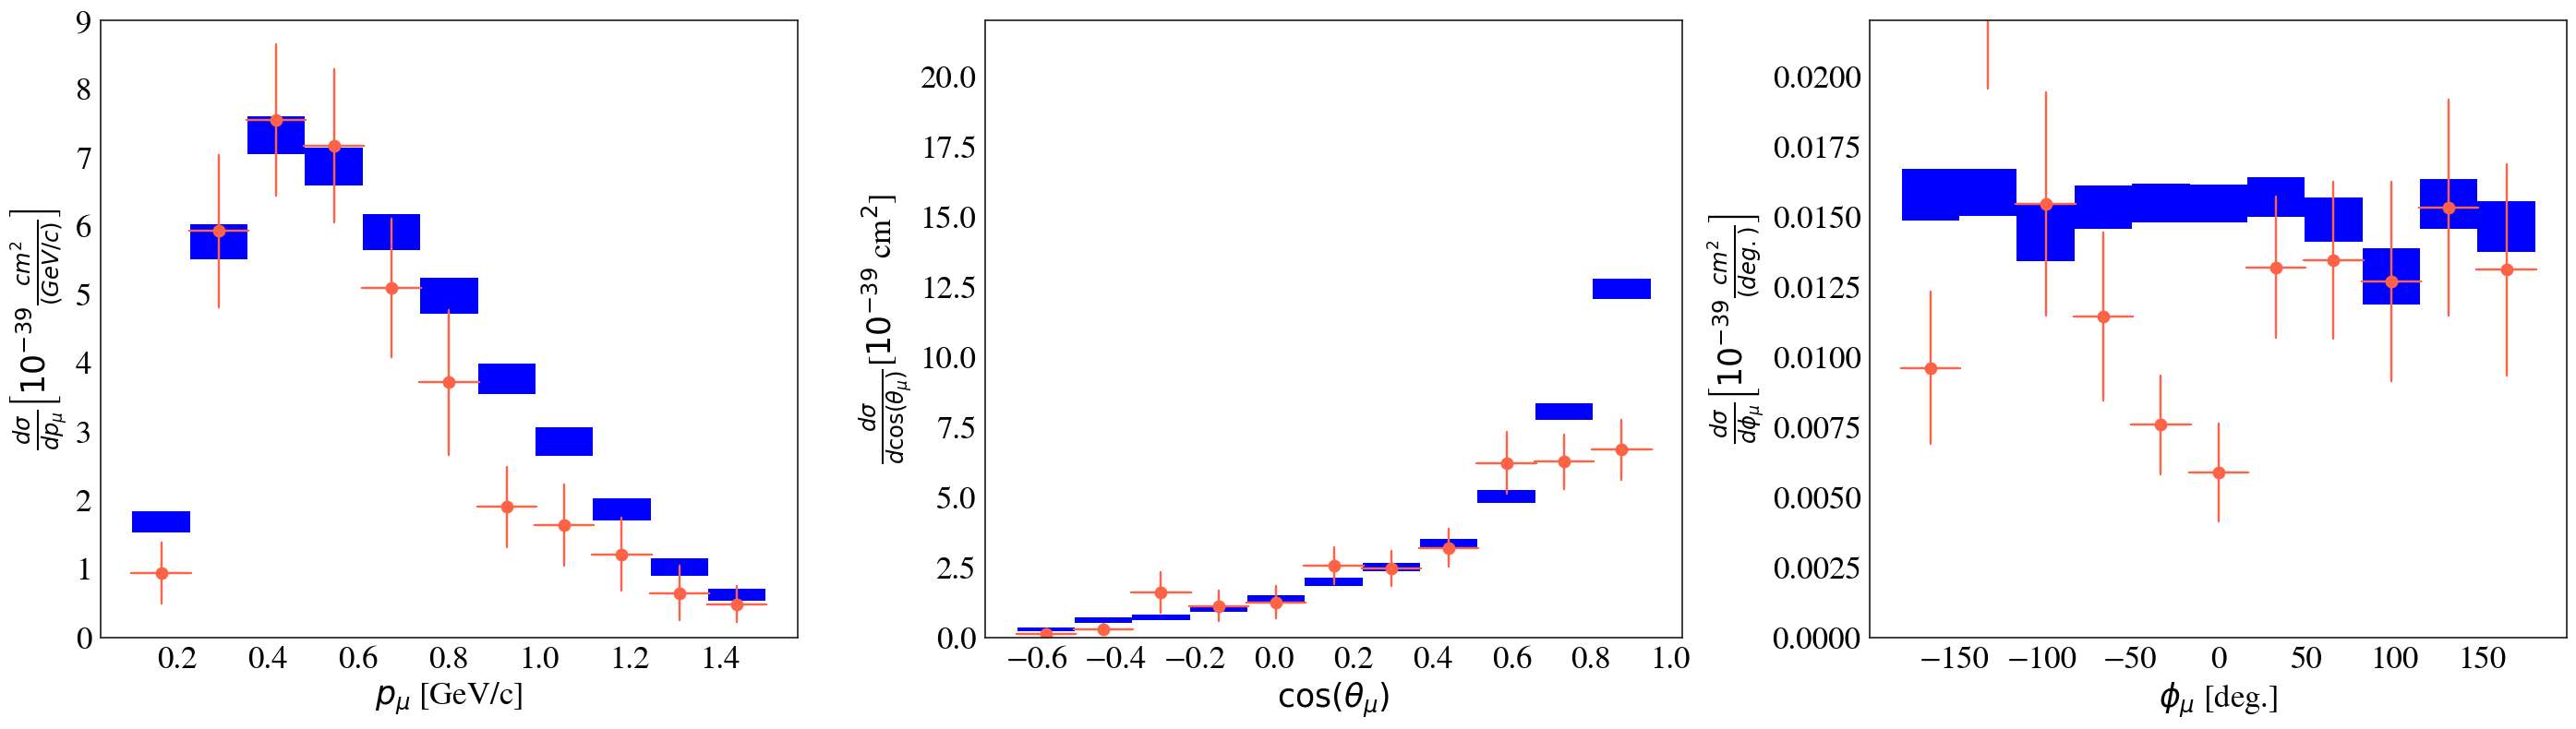

In [76]:
get_Xsec(h=h ,ylim_P=(0,9),ylim_cos_theta=(0,22),ylim_phi=(0,0.022)
         ,do_add_genie_models=False,afro_genie_dict=None)